In [47]:
import os

# Correct path to the train folder
PLANT_PATH = '/kaggle/input/datasets/vipoooool/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'

print("classes:", classes)


classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

In [48]:
classes = sorted(os.listdir(PLANT_PATH))
num_classes = len(classes)

print("Number of classes:", num_classes)


Number of classes: 38


In [50]:
from collections import defaultdict

class_counts = {}

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(PLANT_PATH, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        
plant_names_sorted = sorted(class_counts, key=class_counts.get, reverse=True)
Len_sorted = [class_counts[cls] for cls in plant_names_sorted]

# Show first 10
for k in list(class_counts.keys())[:10]:
    print(f"{k}: {class_counts[k]}")


Apple___Apple_scab: 2016
Apple___Black_rot: 1987
Apple___Cedar_apple_rust: 1760
Apple___healthy: 2008
Blueberry___healthy: 1816
Cherry_(including_sour)___Powdery_mildew: 1683
Cherry_(including_sour)___healthy: 1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642
Corn_(maize)___Common_rust_: 1907
Corn_(maize)___Northern_Leaf_Blight: 1908


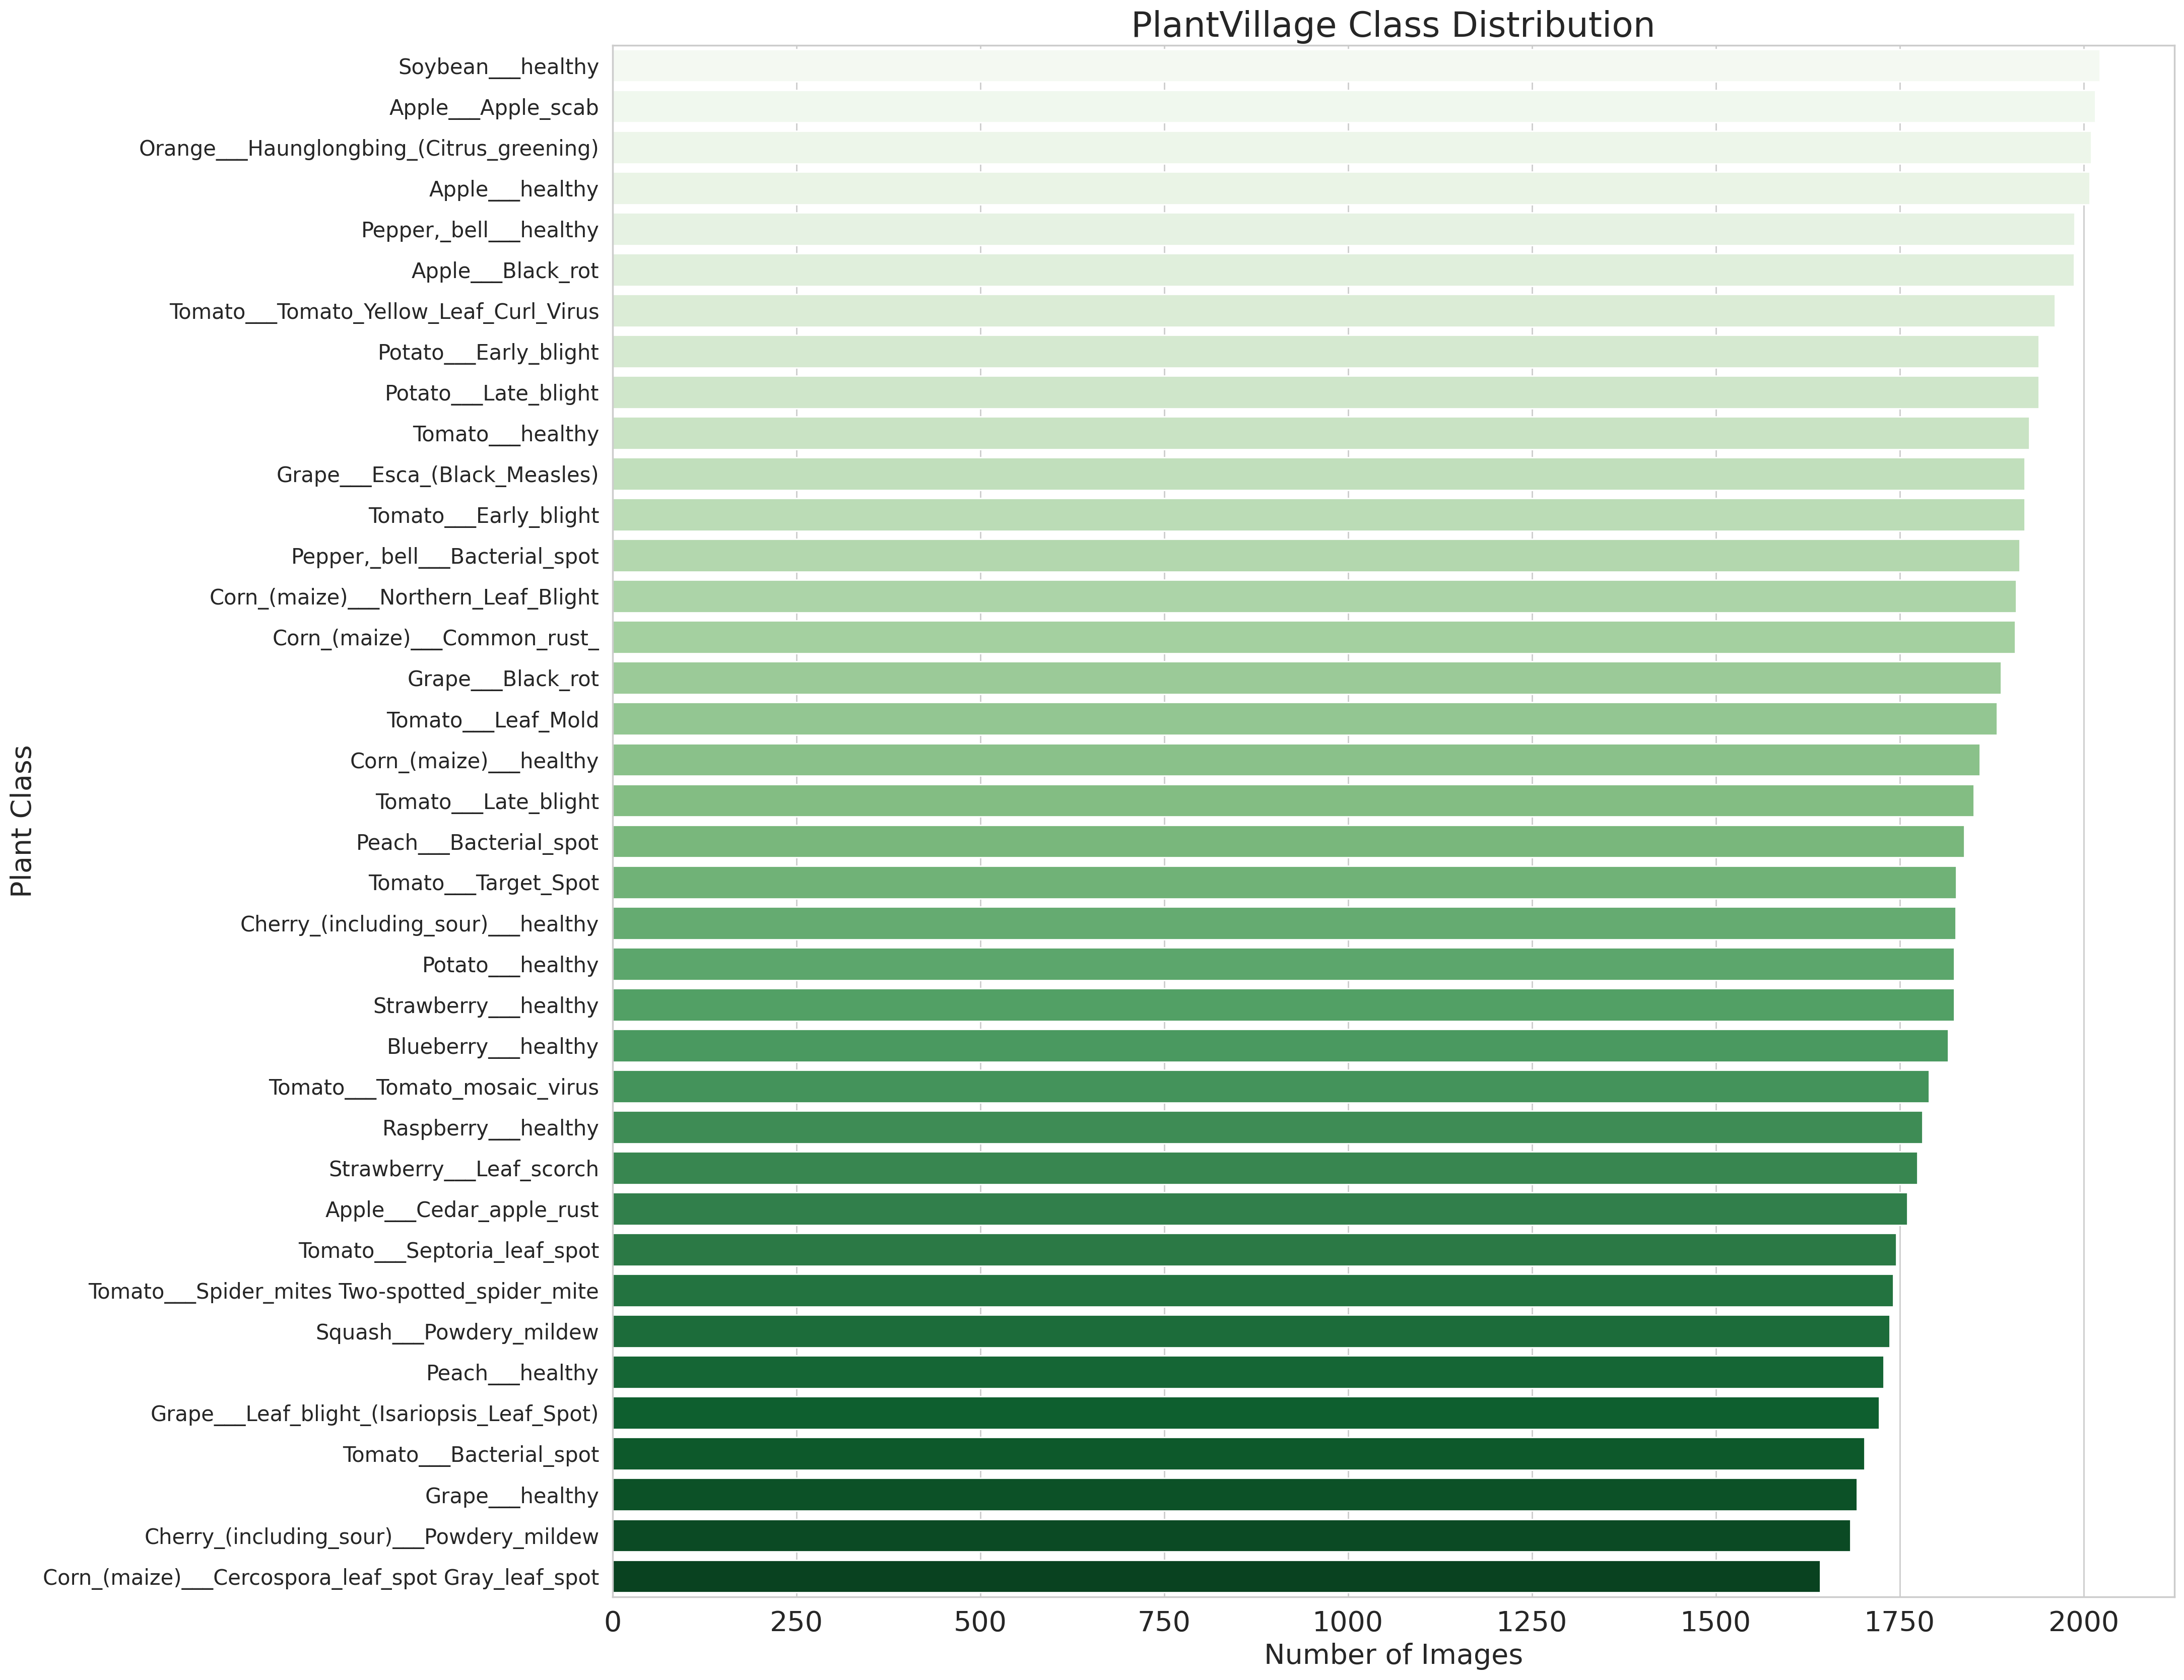

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,20), dpi=200)

ax = sns.barplot(
    x=Len_sorted,
    y=plant_names_sorted,
    hue=plant_names_sorted,  # assign hue to avoid the FutureWarning
    dodge=False,
    palette="Greens",
    legend=False              # this prevents the legend entirely
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Number of Images", fontsize=20)
plt.ylabel("Plant Class", fontsize=20)
plt.title("PlantVillage Class Distribution", fontsize=25)
plt.show()


In [52]:
import pandas as pd

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Num_Images'])
df.sort_values(by='Num_Images', ascending=False, inplace=True)
df.head(10)


,Class,Num_Images
24,Soybean___healthy,2022
0,Apple___Apple_scab,2016
15,Orange___Haunglongbing_(Citrus_greening),2010
3,Apple___healthy,2008
19,"Pepper,_bell___healthy",1988
1,Apple___Black_rot,1987
35,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
21,Potato___Late_blight,1939
20,Potato___Early_blight,1939
37,Tomato___healthy,1926


In [53]:
from PIL import Image
import random

sample_class = random.choice(classes)
sample_img_path = os.path.join(
    PLANT_PATH,
    sample_class,
    random.choice(os.listdir(os.path.join(PLANT_PATH, sample_class)))
)

img = Image.open(sample_img_path)
print("Class:", sample_class)
print("Image size (W, H):", img.size)


Class: Tomato___Late_blight
Image size (W, H): (256, 256)


In [54]:
sizes = set()

for cls in classes[:5]:
    img_path = os.path.join(PLANT_PATH, cls, os.listdir(os.path.join(PLANT_PATH, cls))[0])
    img = Image.open(img_path)
    sizes.add(img.size)

sizes


{(256, 256)}

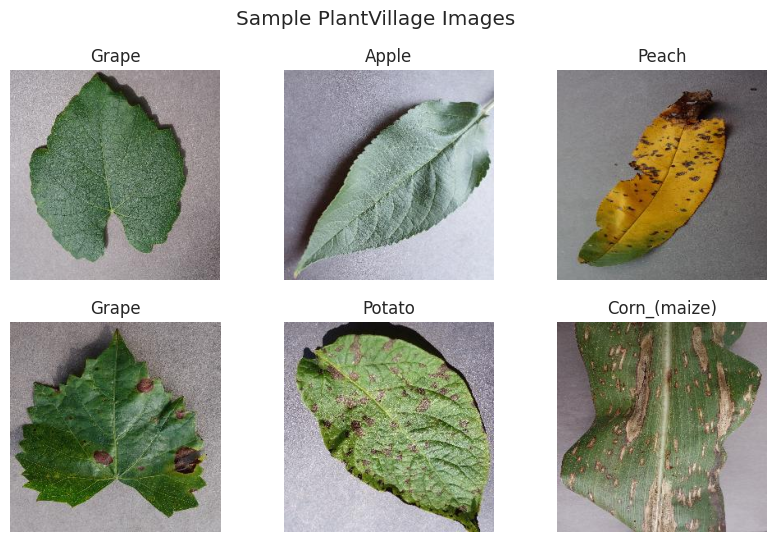

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for i in range(6):
    cls = random.choice(classes)
    img_path = os.path.join(
        PLANT_PATH,
        cls,
        random.choice(os.listdir(os.path.join(PLANT_PATH, cls)))
    )
    img = Image.open(img_path)
    
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(cls.split("___")[0])
    plt.axis("off")

plt.suptitle("Sample PlantVillage Images")
plt.show()


In [56]:
from PIL import Image
import numpy as np
import os

cls = classes[0]
img_path = os.path.join(PLANT_PATH, cls, os.listdir(os.path.join(PLANT_PATH, cls))[0])
img = Image.open(img_path)

# Check mode
print("Image mode:", img.mode)  # 'RGB' or 'L'

# Check pixel statistics
arr = np.array(img)
print("Pixel value range:", arr.min(), "-", arr.max())
print("Shape:", arr.shape)


Image mode: RGB
Pixel value range: 0 - 232
Shape: (256, 256, 3)


## Brightness Analysis

mean_pixel indicates average brightness of images per class (normalized to 0–1).

Values range from 0.334 (Corn_Common_rust_) to 0.552 (Blueberry_healthy), showing moderate variation in brightness across classes.

**Insights:**

Classes with lighter backgrounds (Blueberry_healthy, Corn_healthy) have higher mean values.

Darker backgrounds (Corn_Common_rust_) are reflected in lower mean.

Overall, the dataset is relatively balanced in brightness but not fully uniform.

## Contrast / Background Variation

std_pixel represents contrast or pixel variability:

Low values (~0.14) → low variation, likely uniform background.

High values (~0.23–0.25) → higher variability, possibly complex background or leaf texture.

**Example:**

Corn_Common_rust_: 0.247 → high contrast, noticeable leaf texture.

Squash_Powdery_mildew: 0.138 → low contrast, simple background.

**Implication for preprocessing:**

May benefit from normalization and data augmentation to reduce model bias to background variation.


In [57]:
from PIL import Image
import numpy as np
import os
from tqdm import tqdm


# Get all classes
classes = [cls for cls in os.listdir(PLANT_PATH) if os.path.isdir(os.path.join(PLANT_PATH, cls))]

# Store stats
stats = {}

for cls in classes:
    cls_path = os.path.join(PLANT_PATH, cls)
    images = os.listdir(cls_path)
    
    means, stds = [], []
    for f in tqdm(images, desc=f"Processing {cls}", leave=False):
        img_path = os.path.join(cls_path, f)
        img = Image.open(img_path).convert('RGB')
        arr = np.array(img) / 255.0  # normalize temporarily for stats
        means.append(arr.mean())
        stds.append(arr.std())
    
    stats[cls] = {
        "num_images": len(images),
        "mean_pixel": np.mean(means),
        "std_pixel": np.mean(stds)
    }

# Convert to DataFrame for easier inspection
import pandas as pd
df_stats = pd.DataFrame(stats).T
df_stats = df_stats.sort_index()
df_stats


,num_images,mean_pixel,std_pixel
Apple___Apple_scab,2016.0,0.402056,0.184498
Apple___Black_rot,1987.0,0.445175,0.213716
Apple___Cedar_apple_rust,1760.0,0.483679,0.163537
Apple___healthy,2008.0,0.446646,0.187137
Blueberry___healthy,1816.0,0.572108,0.234339
Cherry_(including_sour)___Powdery_mildew,1683.0,0.448826,0.145776
Cherry_(including_sour)___healthy,1826.0,0.528320,0.182284
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642.0,0.423833,0.179857
Corn_(maize)___Common_rust_,1907.0,0.334039,0.247378
Corn_(maize)___Northern_Leaf_Blight,1908.0,0.441328,0.145151


# Preprocessing

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

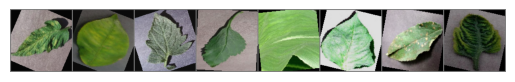

Labels: ['Tomato___Leaf_Mold', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Pepper,_bell___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [66]:
# ===============================
# IMPORTS
# ===============================
import os
from glob import glob
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ===============================
# PARAMETERS
# ===============================
TRAIN_PATH = "/kaggle/input/datasets/vipoooool/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
VAL_PATH = "/kaggle/input/datasets/vipoooool/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
TEST_PATH = "/kaggle/input/datasets/vipoooool/new-plant-diseases-dataset/test/test"

IMG_SIZE = 128
BATCH_SIZE = 32
NUM_WORKERS = 4

# ===============================
# TRANSFORMS
# ===============================
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(25),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.2,0.2,0.2])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.2,0.2,0.2])
])

# ===============================
# DATASETS
# ===============================
train_dataset = datasets.ImageFolder(root=TRAIN_PATH, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=VAL_PATH, transform=val_transforms)

# For test folder (flat structure)
class TestDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.image_paths = sorted(glob(f"{folder_path}/*.JPG"))  # <-- fixed
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, os.path.basename(img_path)

test_dataset = TestDataset(TEST_PATH, transform=val_transforms)

# ===============================
# CLASS NAMES
# ===============================
classes = train_dataset.classes
print("Classes:", classes)
print("Number of classes:", len(classes))
print("Number of training images:", len(train_dataset))
print("Number of validation images:", len(val_dataset))
print("Number of test images:", len(test_dataset))

# ===============================
# DATALOADERS
# ===============================
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

# ===============================
# DISPLAY A BATCH OF TRAINING IMAGES
# ===============================
def imshow(img):
    img = img * 0.2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))
print("Labels:", [classes[i] for i in labels[:8]])


# Custom CNN (From Scratch)

In [68]:
# Compute class weights
from collections import Counter
import torch.nn as nn

# Get labels from train_dataset (random_split safe)
targets = [label for _, label in train_dataset]

class_counts = Counter(targets)
num_classes = len(classes)

# Compute inverse frequency weights
class_weights = torch.zeros(num_classes)

for cls_idx in range(num_classes):
    class_weights[cls_idx] = 1.0 / class_counts[cls_idx]

# Normalize weights (important!)
class_weights = class_weights / class_weights.sum() * num_classes

# Move to same device as model
class_weights = class_weights.to(device)

# Use weighted loss + label smoothing
criterion = nn.CrossEntropyLoss(
    weight=class_weights,
    label_smoothing=0.1
)


In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes=38):
        super(CustomCNN, self).__init__()
        
        # ===============================
        # CONVOLUTIONAL BLOCK 1
        # ===============================
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        
        # ===============================
        # CONVOLUTIONAL BLOCK 2
        # ===============================
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        # ===============================
        # CONVOLUTIONAL BLOCK 3
        # ===============================
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # ===============================
        # CONVOLUTIONAL BLOCK 4
        # ===============================
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        # ===============================
        # FULLY CONNECTED LAYERS
        # ===============================
        # input size: 128x128 -> after 4x2 poolings -> 128/(2^4)=8 -> 8x8x256
        self.fc1 = nn.Linear(256 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout_fc = nn.Dropout(0.5)
        
    def forward(self, x):
        # Conv Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Conv Block 2
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Conv Block 3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Conv Block 4
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        
        return x

# ===============================
# EXAMPLE USAGE
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 38  # adjust based on your dataset
model = CustomCNN(num_classes=num_classes).to(device)

print(model)


CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=38, bias=True)
  (dropout_fc): Dropout(p=0.5, inplace=False)
)


In [70]:
import torch.optim as optim

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-3,         # you can also try 5e-4 or 2e-3
    weight_decay=1e-2  # typical range: 1e-3 to 1e-2
)

In [71]:
from tqdm import tqdm

EPOCHS = 30

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= val_total
    val_acc = val_correct / val_total

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/30: 100%|██████████| 2197/2197 [02:10<00:00, 16.80it/s]


Epoch 1: Train Loss: 3.2941, Train Acc: 0.1022, Val Loss: 2.8955, Val Acc: 0.2943


Epoch 2/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.67it/s]


Epoch 2: Train Loss: 3.0925, Train Acc: 0.1443, Val Loss: 2.5951, Val Acc: 0.4262


Epoch 3/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.71it/s]


Epoch 3: Train Loss: 2.9966, Train Acc: 0.1696, Val Loss: 2.4677, Val Acc: 0.5427


Epoch 4/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.49it/s]


Epoch 4: Train Loss: 2.9278, Train Acc: 0.1899, Val Loss: 2.2134, Val Acc: 0.6058


Epoch 5/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.51it/s]


Epoch 5: Train Loss: 2.8130, Train Acc: 0.2273, Val Loss: 2.0606, Val Acc: 0.6438


Epoch 6/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.55it/s]


Epoch 6: Train Loss: 2.7148, Train Acc: 0.2600, Val Loss: 1.9121, Val Acc: 0.7159


Epoch 7/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.46it/s]


Epoch 7: Train Loss: 2.6538, Train Acc: 0.2822, Val Loss: 1.8479, Val Acc: 0.7380


Epoch 8/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.50it/s]


Epoch 8: Train Loss: 2.5339, Train Acc: 0.3295, Val Loss: 1.6623, Val Acc: 0.7608


Epoch 9/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.44it/s]


Epoch 9: Train Loss: 2.1474, Train Acc: 0.4889, Val Loss: 1.3135, Val Acc: 0.8639


Epoch 10/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.57it/s]


Epoch 10: Train Loss: 1.9886, Train Acc: 0.5571, Val Loss: 1.2228, Val Acc: 0.9032


Epoch 11/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.46it/s]


Epoch 11: Train Loss: 1.8589, Train Acc: 0.6129, Val Loss: 1.1267, Val Acc: 0.9186


Epoch 12/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.58it/s]


Epoch 12: Train Loss: 1.7944, Train Acc: 0.6404, Val Loss: 1.0903, Val Acc: 0.9295


Epoch 13/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.70it/s]


Epoch 13: Train Loss: 1.7208, Train Acc: 0.6747, Val Loss: 1.0490, Val Acc: 0.9468


Epoch 14/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.67it/s]


Epoch 14: Train Loss: 1.6592, Train Acc: 0.6998, Val Loss: 1.0195, Val Acc: 0.9434


Epoch 15/30: 100%|██████████| 2197/2197 [02:03<00:00, 17.73it/s]


Epoch 15: Train Loss: 1.5992, Train Acc: 0.7269, Val Loss: 0.9856, Val Acc: 0.9573


Epoch 16/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.62it/s]


Epoch 16: Train Loss: 1.5570, Train Acc: 0.7437, Val Loss: 1.0014, Val Acc: 0.9510


Epoch 17/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.55it/s]


Epoch 17: Train Loss: 1.5390, Train Acc: 0.7526, Val Loss: 0.9964, Val Acc: 0.9502


Epoch 18/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.67it/s]


Epoch 18: Train Loss: 1.4800, Train Acc: 0.7823, Val Loss: 0.9861, Val Acc: 0.9538


Epoch 19/30: 100%|██████████| 2197/2197 [02:03<00:00, 17.73it/s]


Epoch 19: Train Loss: 1.4101, Train Acc: 0.8155, Val Loss: 0.9713, Val Acc: 0.9604


Epoch 20/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.56it/s]


Epoch 20: Train Loss: 1.3581, Train Acc: 0.8360, Val Loss: 0.9608, Val Acc: 0.9648


Epoch 21/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.59it/s]


Epoch 21: Train Loss: 1.3162, Train Acc: 0.8528, Val Loss: 0.9531, Val Acc: 0.9628


Epoch 22/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.67it/s]


Epoch 22: Train Loss: 1.2878, Train Acc: 0.8652, Val Loss: 0.9443, Val Acc: 0.9657


Epoch 23/30: 100%|██████████| 2197/2197 [02:03<00:00, 17.76it/s]


Epoch 23: Train Loss: 1.2683, Train Acc: 0.8725, Val Loss: 0.9135, Val Acc: 0.9721


Epoch 24/30: 100%|██████████| 2197/2197 [02:03<00:00, 17.72it/s]


Epoch 24: Train Loss: 1.2462, Train Acc: 0.8824, Val Loss: 0.9481, Val Acc: 0.9609


Epoch 25/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.54it/s]


Epoch 25: Train Loss: 1.2286, Train Acc: 0.8900, Val Loss: 0.9043, Val Acc: 0.9735


Epoch 26/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.50it/s]


Epoch 26: Train Loss: 1.2144, Train Acc: 0.8946, Val Loss: 0.9081, Val Acc: 0.9737


Epoch 27/30: 100%|██████████| 2197/2197 [02:04<00:00, 17.64it/s]


Epoch 27: Train Loss: 1.1957, Train Acc: 0.9009, Val Loss: 0.8945, Val Acc: 0.9784


Epoch 28/30: 100%|██████████| 2197/2197 [02:05<00:00, 17.56it/s]


Epoch 28: Train Loss: 1.1799, Train Acc: 0.9064, Val Loss: 0.9062, Val Acc: 0.9770


Epoch 29/30: 100%|██████████| 2197/2197 [02:10<00:00, 16.85it/s]


Epoch 29: Train Loss: 1.1744, Train Acc: 0.9085, Val Loss: 0.9058, Val Acc: 0.9748


Epoch 30/30: 100%|██████████| 2197/2197 [02:06<00:00, 17.38it/s]


Epoch 30: Train Loss: 1.1650, Train Acc: 0.9140, Val Loss: 0.8938, Val Acc: 0.9762


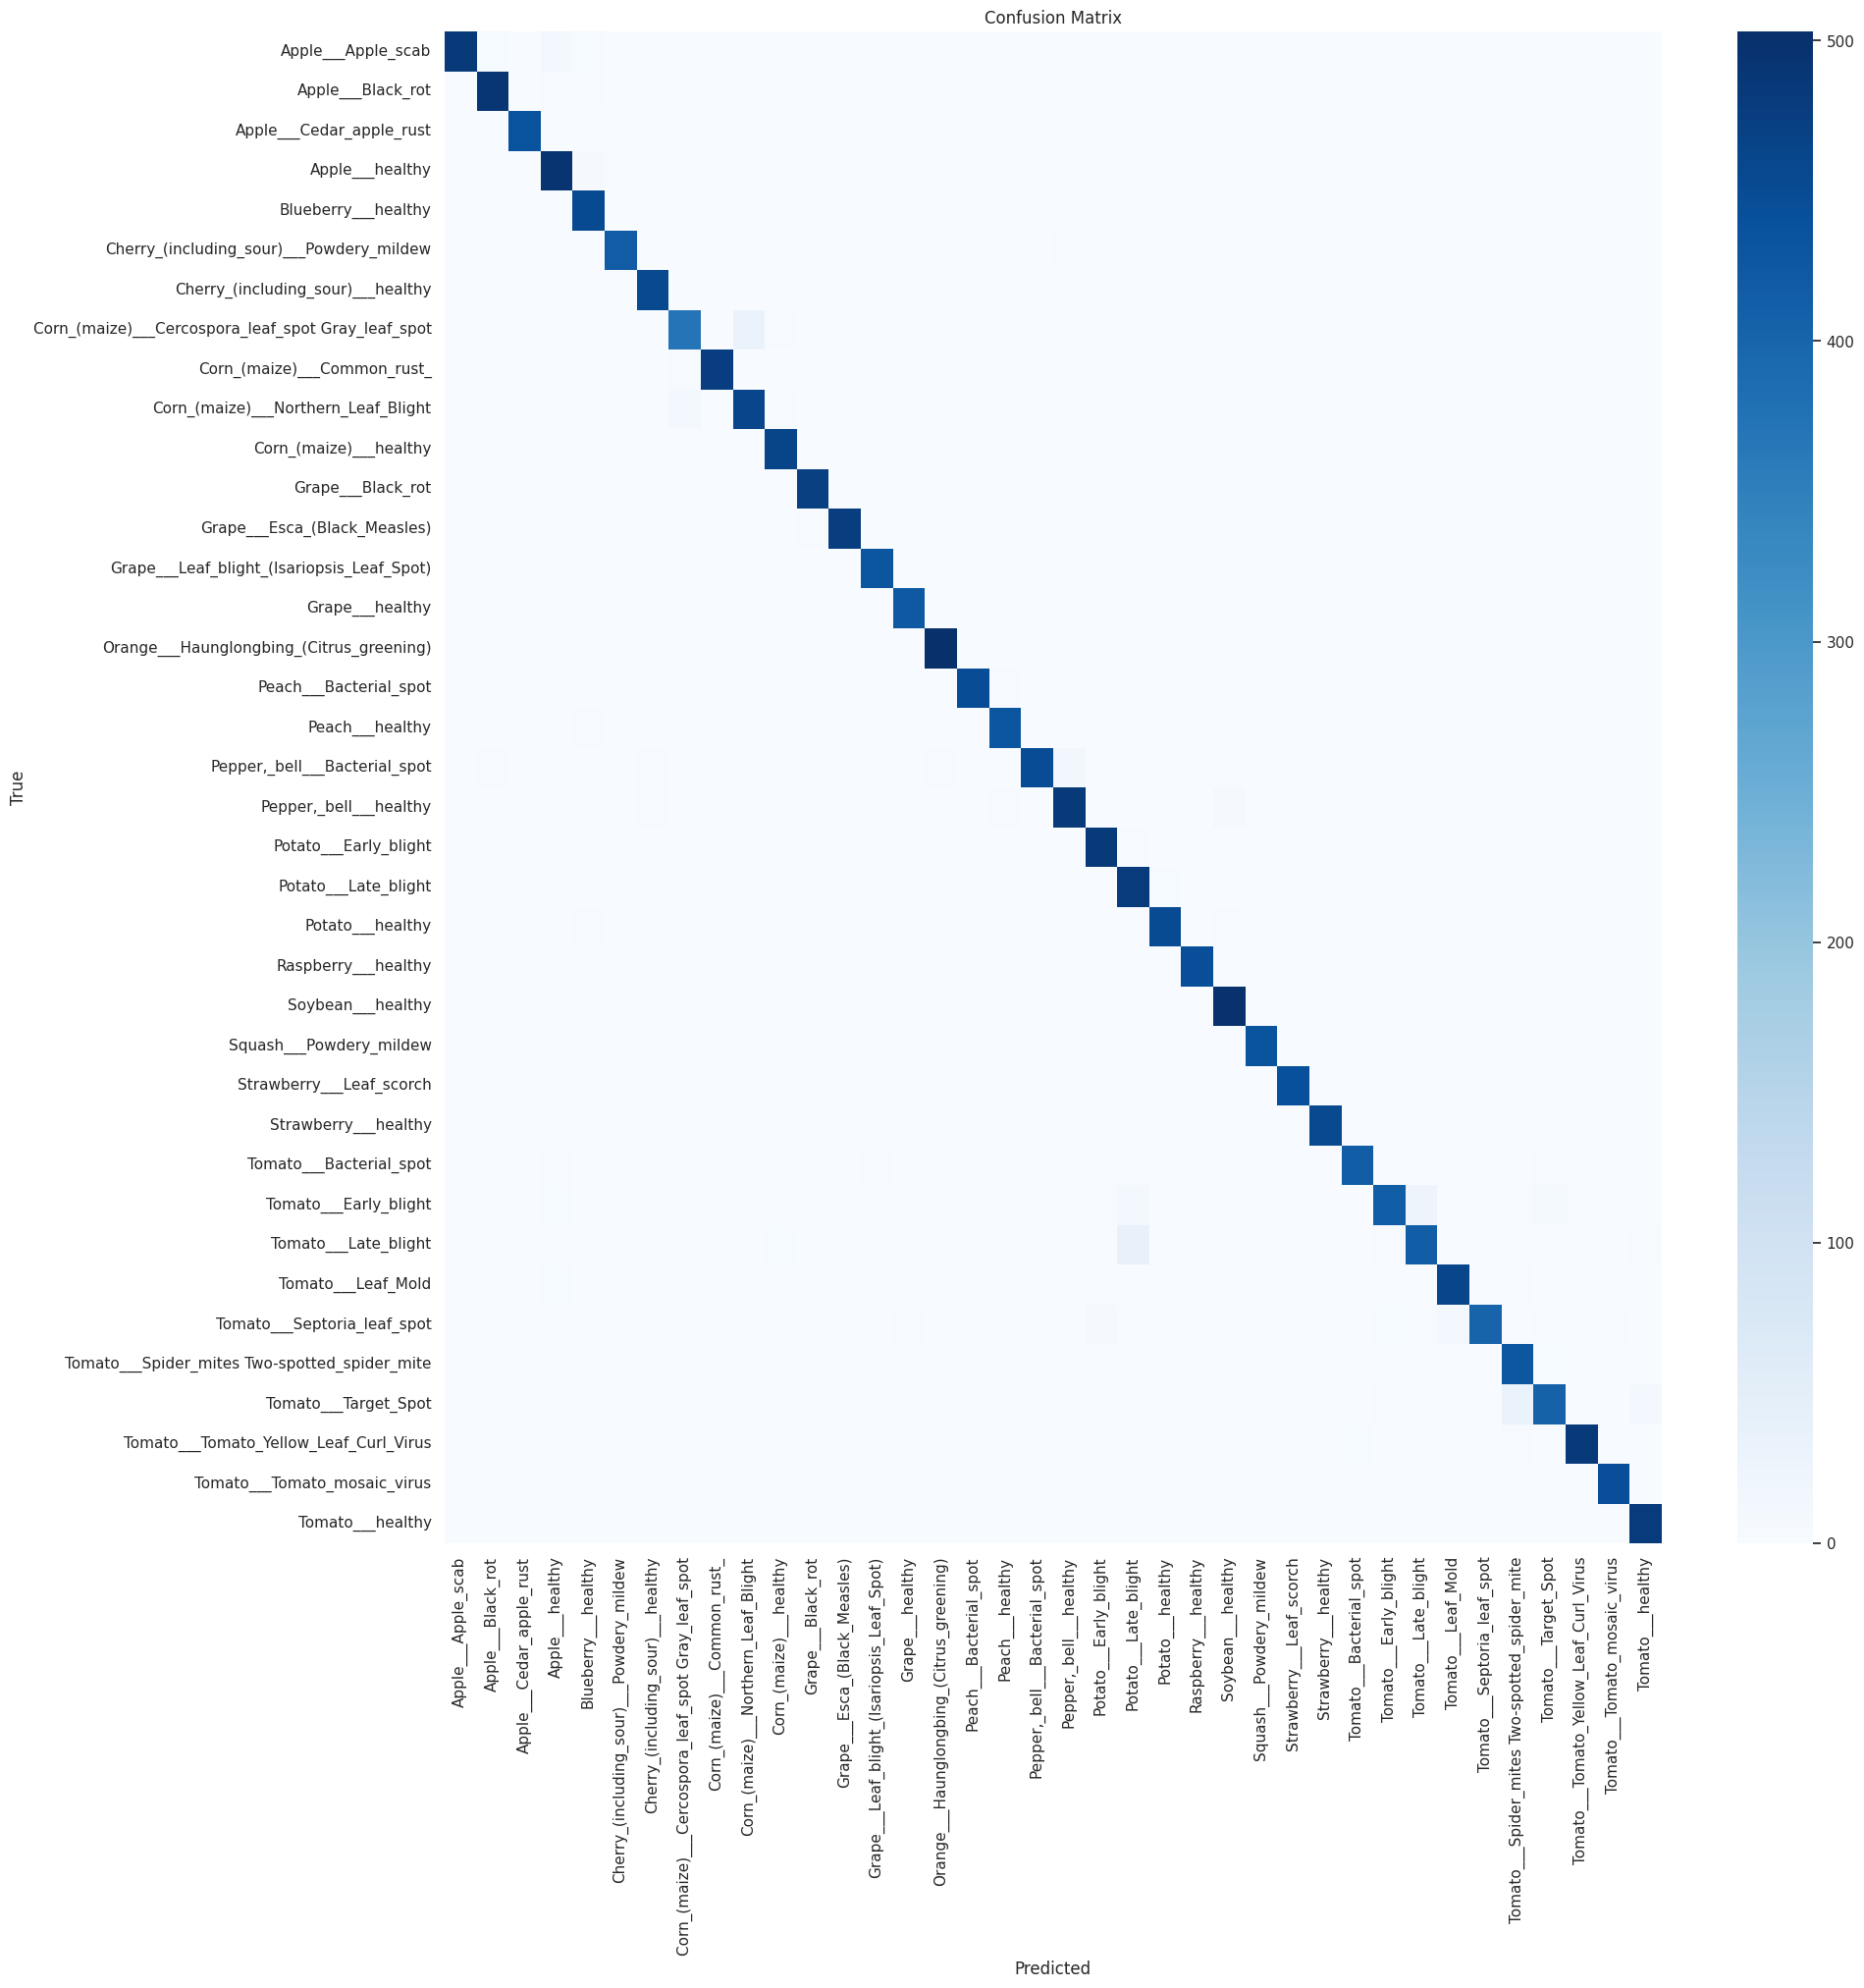

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     1.0000    0.9583    0.9787       504
                                 Apple___Black_rot     0.9820    0.9859    0.9839       497
                          Apple___Cedar_apple_rust     0.9977    0.9932    0.9954       440
                                   Apple___healthy     0.9338    0.9841    0.9583       502
                               Blueberry___healthy     0.9537    0.9978    0.9752       454
          Cherry_(including_sour)___Powdery_mildew     0.9976    0.9929    0.9952       421
                 Cherry_(including_sour)___healthy     0.9891    0.9956    0.9923       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9587    0.9049    0.9310       410
                       Corn_(maize)___Common_rust_     1.0000    0.9958    0.9979       477
               Corn_(maize)___Northern_Leaf_Blight     0.9296    0.9686    0.94

In [72]:
# ===============================
# EVALUATION ON VALIDATION SET
# ===============================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# ===============================
# CONFUSION MATRIX
# ===============================
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(20, 20))
sns.heatmap(
    cm,
    annot=False,
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ===============================
# CLASSIFICATION REPORT
# ===============================
print(classification_report(
    all_labels,
    all_preds,
    target_names=classes,
    digits=4
))


In [74]:

torch.save({
    'model_state_dict': model.state_dict(),
    'classes': classes
}, "plant_disease__classification_model.pth")


# Pretrained Model (Transfer Learning)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from collections import Counter
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


**Pretrained models expect ImageNet normalization.**

In [6]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [7]:
DATA_PATH = "/kaggle/input/datasets/abdallahalidev/plantvillage-dataset/color"

full_dataset = datasets.ImageFolder(
    root=DATA_PATH,
    transform=train_transform   # temp transform
)

classes = full_dataset.classes
num_classes = len(classes)

print("Classes:", num_classes)
print("Total images:", len(full_dataset))


Classes: 38
Total images: 54305


In [8]:
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size]
)

# IMPORTANT: different transforms
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform


In [9]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)


In [11]:
targets = [label for _, label in train_dataset]
class_counts = Counter(targets)

class_weights = np.array(
    [1.0 / class_counts[i] for i in range(num_classes)]
)

# Normalize + soften
class_weights = class_weights / class_weights.sum()
class_weights = np.sqrt(class_weights)

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)


### ResNet18 Model

In [15]:
resnet18 = models.resnet18(pretrained=True)

# Freeze backbone
for param in resnet18.parameters():
    param.requires_grad = False

# Replace classifier
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18 = resnet18.to(device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


### MobileNetV2 Model 

In [16]:
mobilenet = models.mobilenet_v2(pretrained=True)

for param in mobilenet.parameters():
    param.requires_grad = False

mobilenet.classifier[1] = nn.Linear(
    mobilenet.classifier[1].in_features,
    num_classes
)

mobilenet = mobilenet.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 120MB/s]


In [17]:
def get_optimizer(model):
    return optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=1e-3
    )


In [18]:
def train_one_epoch(model, loader, optimizer):
    model.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return running_loss / len(loader), correct / total


def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return running_loss / len(loader), correct / total


In [19]:
def train_model(model, epochs=10):
    optimizer = get_optimizer(model)

    for epoch in range(epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer)
        val_loss, val_acc = validate(model, val_loader)

        print(
            f"Epoch [{epoch+1}/{epochs}] "
            f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}"
        )


In [20]:
print("\nTraining ResNet18")
train_model(resnet18, epochs=10)


Training ResNet18
Epoch [1/10] Train Acc: 0.8821 | Val Acc: 0.9449
Epoch [2/10] Train Acc: 0.9427 | Val Acc: 0.9540
Epoch [3/10] Train Acc: 0.9495 | Val Acc: 0.9582
Epoch [4/10] Train Acc: 0.9525 | Val Acc: 0.9600
Epoch [5/10] Train Acc: 0.9562 | Val Acc: 0.9599
Epoch [6/10] Train Acc: 0.9574 | Val Acc: 0.9548
Epoch [7/10] Train Acc: 0.9593 | Val Acc: 0.9564
Epoch [8/10] Train Acc: 0.9599 | Val Acc: 0.9564
Epoch [9/10] Train Acc: 0.9591 | Val Acc: 0.9610
Epoch [10/10] Train Acc: 0.9614 | Val Acc: 0.9564


In [21]:

print("\nTraining MobileNetV2")
train_model(mobilenet, epochs=10)


Training MobileNetV2
Epoch [1/10] Train Acc: 0.8967 | Val Acc: 0.9558
Epoch [2/10] Train Acc: 0.9402 | Val Acc: 0.9588
Epoch [3/10] Train Acc: 0.9440 | Val Acc: 0.9593
Epoch [4/10] Train Acc: 0.9446 | Val Acc: 0.9605
Epoch [5/10] Train Acc: 0.9438 | Val Acc: 0.9627
Epoch [6/10] Train Acc: 0.9452 | Val Acc: 0.9640
Epoch [7/10] Train Acc: 0.9470 | Val Acc: 0.9662
Epoch [8/10] Train Acc: 0.9452 | Val Acc: 0.9662
Epoch [9/10] Train Acc: 0.9444 | Val Acc: 0.9667
Epoch [10/10] Train Acc: 0.9454 | Val Acc: 0.9673


# Inference

In [16]:
# ===============================
# IMPORTS
# ===============================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F
import numpy as np

# ===============================
# PARAMETERS
# ===============================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/kaggle/working/plant_disease_model.pth"  # replace with your checkpoint
IMG_SIZE = 128  # same as training
TOP_K = 5       # top-k predictions

# ===============================
# DEFINE MODEL
# ===============================
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# ===============================
# LOAD CHECKPOINT
# ===============================
checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)
classes = checkpoint["classes"]  # load classes saved in checkpoint
model = CustomCNN(num_classes=len(classes)).to(DEVICE)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
print("✅ Model Loaded Successfully")

# ===============================
# IMAGE TRANSFORM
# ===============================
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.2,0.2,0.2])
])

# ===============================
# INFERENCE FUNCTION
# ===============================
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(DEVICE)  # add batch dim

    with torch.no_grad():
        outputs = model(image)
        probs = torch.softmax(outputs, dim=1)
    
    # Top-1
    conf, pred_idx = torch.max(probs, dim=1)
    label = classes[pred_idx.item()]

    # Top-K
    topk_probs, topk_idxs = torch.topk(probs, k=TOP_K, dim=1)
    topk_labels = [classes[i] for i in topk_idxs[0]]
    topk_probs = topk_probs[0].cpu().numpy()

    return label, conf.item(), list(zip(topk_labels, topk_probs))

# ===============================
# EXAMPLE USAGE
# ===============================
test_image_path = "/kaggle/input/datasets/abdallahalidev/plantvillage-dataset/color/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG"
label, conf, top5 = predict_image(test_image_path)

print("\nFinal Prediction:")
print(f"Label: {label}")
print(f"Confidence: {conf:.4f}\n")

print("Top 5 Predictions:")
for lbl, p in top5:
    print(f"{lbl} : {p:.4f}")


✅ Model Loaded Successfully

Final Prediction:
Label: Tomato___Late_blight
Confidence: 0.4187

Top 5 Predictions:
Tomato___Late_blight : 0.4187
Potato___Late_blight : 0.2324
Tomato___Early_blight : 0.1446
Cherry_(including_sour)___Powdery_mildew : 0.0206
Tomato___Bacterial_spot : 0.0195


In [17]:
# ===============================
# IMPORTS
# ===============================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F
import numpy as np

# ===============================
# PARAMETERS
# ===============================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/kaggle/working/plant_disease_model.pth"  # replace with your checkpoint
IMG_SIZE = 128  # same as training
TOP_K = 5       # top-k predictions

# ===============================
# DEFINE MODEL
# ===============================
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# ===============================
# LOAD CHECKPOINT
# ===============================
checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)
classes = checkpoint["classes"]  # load classes saved in checkpoint
model = CustomCNN(num_classes=len(classes)).to(DEVICE)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
print("✅ Model Loaded Successfully")

# ===============================
# IMAGE TRANSFORM
# ===============================
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.2,0.2,0.2])
])

# ===============================
# INFERENCE FUNCTION
# ===============================
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(DEVICE)  # add batch dim

    with torch.no_grad():
        outputs = model(image)
        probs = torch.softmax(outputs, dim=1)
    
    # Top-1
    conf, pred_idx = torch.max(probs, dim=1)
    label = classes[pred_idx.item()]

    # Top-K
    topk_probs, topk_idxs = torch.topk(probs, k=TOP_K, dim=1)
    topk_labels = [classes[i] for i in topk_idxs[0]]
    topk_probs = topk_probs[0].cpu().numpy()

    return label, conf.item(), list(zip(topk_labels, topk_probs))

# ===============================
# EXAMPLE USAGE
# ===============================
test_image_path = "/kaggle/input/datasets/abdallahalidev/plantvillage-dataset/color/Potato___Late_blight/025f3c76-6d6c-4dad-ba22-e3e72d084ef1___RS_LB 3105.JPG"
label, conf, top5 = predict_image(test_image_path)

print("\nFinal Prediction:")
print(f"Label: {label}")
print(f"Confidence: {conf:.4f}\n")

print("Top 5 Predictions:")
for lbl, p in top5:
    print(f"{lbl} : {p:.4f}")


✅ Model Loaded Successfully

Final Prediction:
Label: Potato___Late_blight
Confidence: 0.8971

Top 5 Predictions:
Potato___Late_blight : 0.8971
Tomato___Late_blight : 0.0504
Tomato___Target_Spot : 0.0109
Potato___healthy : 0.0085
Potato___Early_blight : 0.0045


In [21]:
from torch.utils.data import random_split

test_size = int(0.1 * len(full_dataset))  # 10% for test
train_size = len(full_dataset) - test_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


In [77]:
# ===============================
# IMPORTS
# ===============================
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import json

# ===============================
# PARAMETERS
# ===============================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/kaggle/input/plant-disease-model-pth/plant_disease__classification_model.pth" 
NUM_CLASSES = 38
IMG_SIZE = 128

# ===============================
# LOAD MODEL
# ===============================
model = CustomCNN(num_classes=NUM_CLASSES).to(DEVICE)

checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)
if "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)
model.eval()
print("✅ Model Loaded Successfully")

# ===============================
# CLASS NAMES
# ===============================
# Hard-coded class names (from your dataset)
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
           'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
           'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
           'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
           'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
           'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
           'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
           'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
           'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
           'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
           'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
           'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# ===============================
# IMAGE TRANSFORM
# ===============================
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.2, 0.2, 0.2])
])

# ===============================
# PREDICTION FUNCTION
# ===============================
def predict_image(image_path, topk=5):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(DEVICE)
    
    with torch.no_grad():
        outputs = model(image)
        probs = F.softmax(outputs, dim=1)
    
    top_probs, top_idxs = probs.topk(topk)
    top_probs = top_probs.cpu().numpy()[0]
    top_idxs = top_idxs.cpu().numpy()[0]
    
    top_classes = [classes[i] for i in top_idxs]
    return list(zip(top_classes, top_probs))

# ===============================
# INFERENCE ON SINGLE IMAGE OR FOLDER
# ===============================
# You can pass a folder path or a single image path
TEST_PATH = "/kaggle/input/datasets/vipoooool/new-plant-diseases-dataset/test/test"

# Detect if folder or single image
if os.path.isdir(TEST_PATH):
    test_images = [os.path.join(TEST_PATH, f) for f in os.listdir(TEST_PATH)
                   if f.lower().endswith((".jpg", ".jpeg", ".png"))]
elif os.path.isfile(TEST_PATH):
    test_images = [TEST_PATH]
else:
    test_images = []

print(f"Number of test images: {len(test_images)}")

# ===============================
# RUN PREDICTIONS
# ===============================
for i, img_path in enumerate(test_images):
    print(f"\nImage {i+1} ({os.path.basename(img_path)}):")
    predictions = predict_image(img_path, topk=5)
    for cls, prob in predictions:
        print(f"{cls} : {prob:.4f}")

✅ Model Loaded Successfully
Number of test images: 33

Image 1 (TomatoEarlyBlight6.JPG):
Tomato___Early_blight : 0.4053
Tomato___Spider_mites Two-spotted_spider_mite : 0.1736
Apple___healthy : 0.1438
Tomato___Target_Spot : 0.0624
Tomato___Bacterial_spot : 0.0253

Image 2 (TomatoYellowCurlVirus4.JPG):
Tomato___Tomato_Yellow_Leaf_Curl_Virus : 0.8367
Tomato___Bacterial_spot : 0.0327
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 0.0216
Orange___Haunglongbing_(Citrus_greening) : 0.0129
Squash___Powdery_mildew : 0.0123

Image 3 (TomatoYellowCurlVirus6.JPG):
Tomato___Tomato_Yellow_Leaf_Curl_Virus : 0.9917
Tomato___Bacterial_spot : 0.0011
Cherry_(including_sour)___Powdery_mildew : 0.0009
Tomato___Tomato_mosaic_virus : 0.0008
Tomato___Leaf_Mold : 0.0007

Image 4 (PotatoHealthy2.JPG):
Potato___healthy : 0.9761
Potato___Late_blight : 0.0070
Soybean___healthy : 0.0041
Tomato___Target_Spot : 0.0016
Strawberry___healthy : 0.0016

Image 5 (TomatoYellowCurlVirus5.JPG):
Tomato___Tomato_Yellow_Leaf_Curl_

# Deployment

In [82]:
OUTPUT_TORCHSCRIPT_PATH = "/kaggle/working/plant_disease_model_mobile.pt"

example_input = torch.randn(1, 3, IMG_SIZE, IMG_SIZE).to(DEVICE)
traced_model = torch.jit.trace(model, example_input)
traced_model.save(OUTPUT_TORCHSCRIPT_PATH)
print(f"\n✅ TorchScript model saved at: {OUTPUT_TORCHSCRIPT_PATH}")


✅ TorchScript model saved at: /kaggle/working/plant_disease_model_mobile.pt
